# Using Keras

In [0]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

Loading up the MNIST data set. In Keras, it's a little bit different - there are 60K training samples and 10K test samples. No "validation" samples.

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


We need to explicitly convert the data into the format Keras / TensorFlow expects. We divide the image data by 255 in order to normalize it into 0-1 range, after converting it into floating point values.

In [0]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Now we'll convert the 0-9 labels into "one-hot" format, as we did for TensorFlow.

In [0]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Visualizing one of the training images just to make sure it looks OK:

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


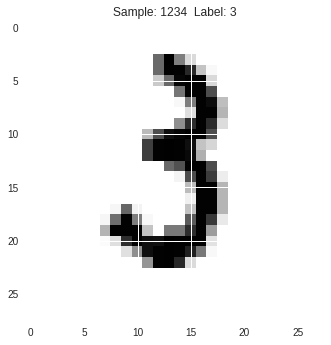

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

Setting up the architecture of model. The input layer of 784 features feeds into a ReLU layer of 512 nodes, which then goes into 10 nodes with softmax applied.

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(200, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Setting up our optimizer and loss function. I used the RMSProp optimizer here.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

I did 10 epochs with a batch size of 100.

In [22]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2445 - acc: 0.9285 - val_loss: 0.1306 - val_acc: 0.9598
Epoch 2/10
 - 5s - loss: 0.0991 - acc: 0.9700 - val_loss: 0.0922 - val_acc: 0.9705
Epoch 3/10
 - 5s - loss: 0.0660 - acc: 0.9798 - val_loss: 0.0728 - val_acc: 0.9768
Epoch 4/10
 - 5s - loss: 0.0486 - acc: 0.9858 - val_loss: 0.0713 - val_acc: 0.9776
Epoch 5/10
 - 5s - loss: 0.0364 - acc: 0.9889 - val_loss: 0.0684 - val_acc: 0.9807
Epoch 6/10
 - 5s - loss: 0.0279 - acc: 0.9917 - val_loss: 0.0654 - val_acc: 0.9800
Epoch 7/10
 - 5s - loss: 0.0217 - acc: 0.9935 - val_loss: 0.0718 - val_acc: 0.9806
Epoch 8/10
 - 5s - loss: 0.0166 - acc: 0.9952 - val_loss: 0.0676 - val_acc: 0.9822
Epoch 9/10
 - 5s - loss: 0.0134 - acc: 0.9962 - val_loss: 0.0792 - val_acc: 0.9808
Epoch 10/10
 - 5s - loss: 0.0101 - acc: 0.9971 - val_loss: 0.0753 - val_acc: 0.9826


But, even with just 10 epochs, this model has outperformed the Tensorflow version considerably!

In [23]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07532524926985297
Test accuracy: 0.9826


 Visualizing the ones it got wrong.

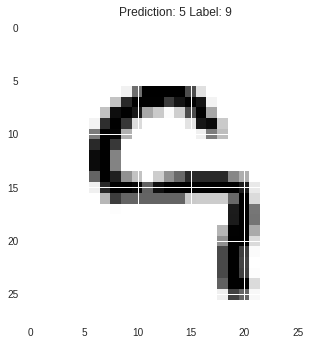

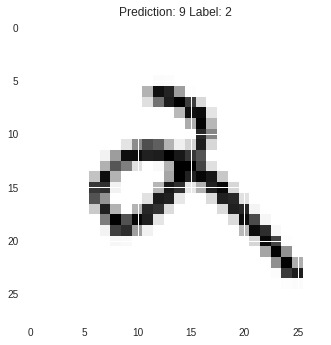

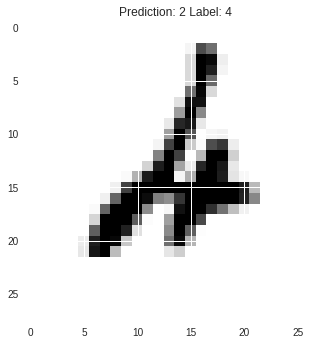

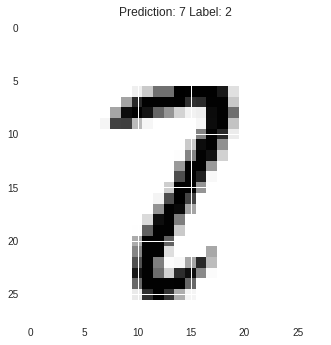

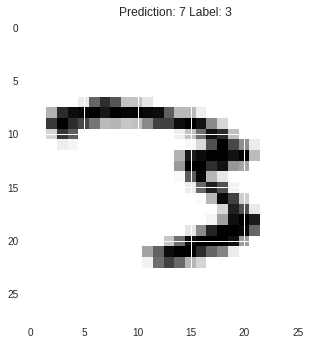

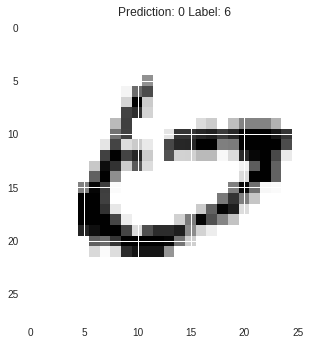

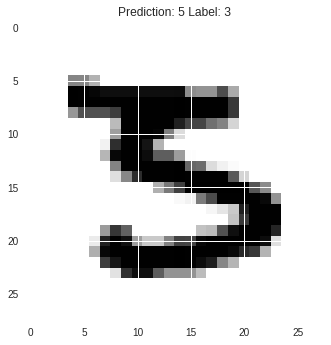

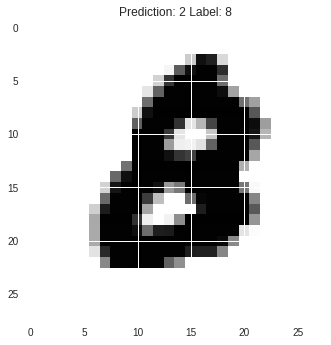

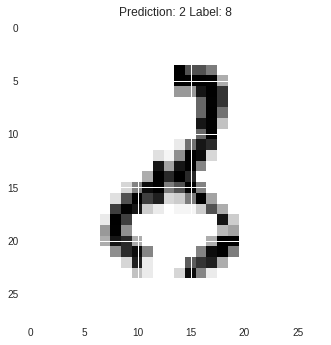

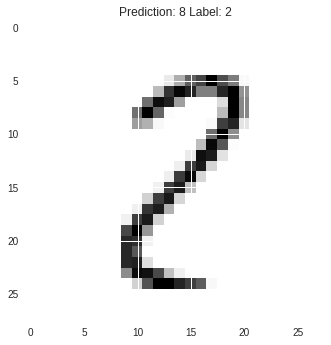

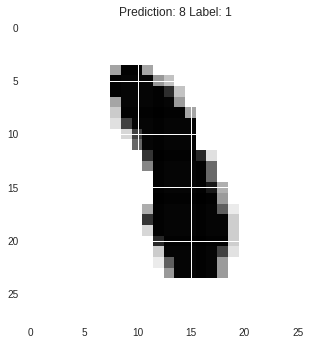

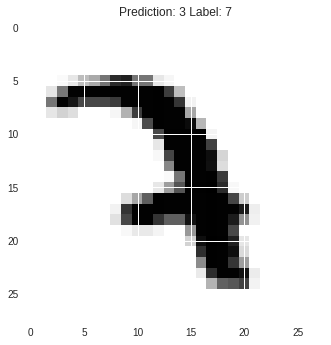

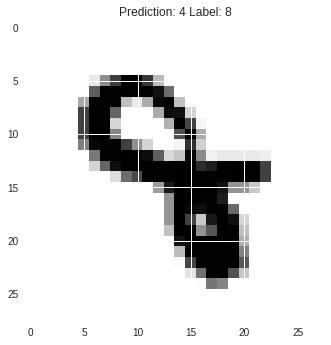

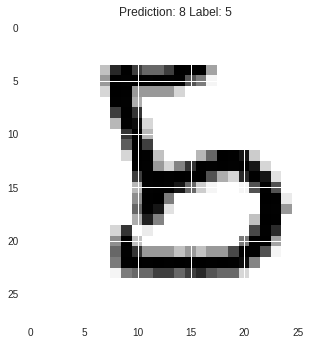

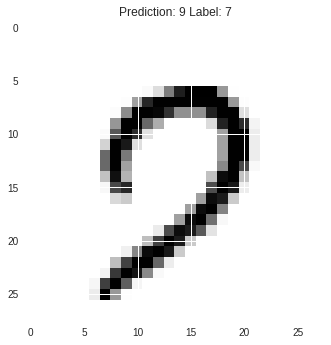

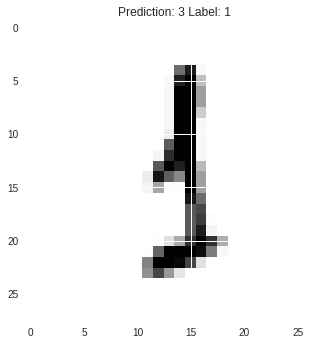

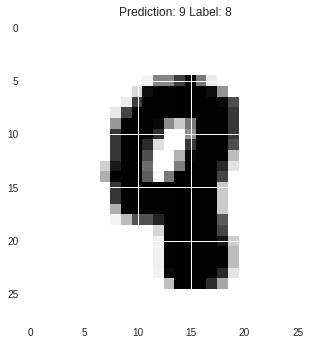

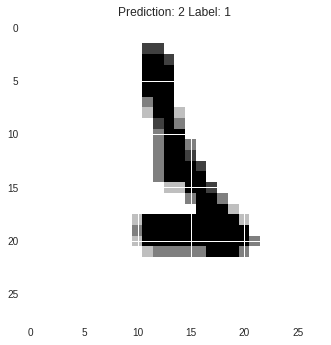

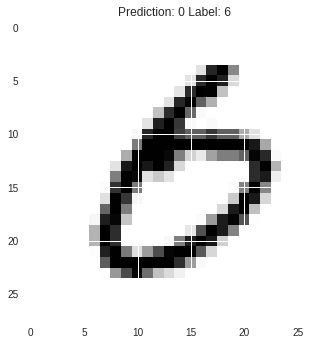

In [11]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

Most of the ones it's having trouble with, are images a human would have trouble with as well!

Trying a different architecture of model using an additional hidden layer and dropout of 20% in each hidden layer.

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [26]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2520 - acc: 0.9227 - val_loss: 0.1147 - val_acc: 0.9638
Epoch 2/10
 - 7s - loss: 0.1063 - acc: 0.9683 - val_loss: 0.1007 - val_acc: 0.9696
Epoch 3/10
 - 7s - loss: 0.0799 - acc: 0.9767 - val_loss: 0.0820 - val_acc: 0.9757
Epoch 4/10
 - 7s - loss: 0.0629 - acc: 0.9810 - val_loss: 0.0687 - val_acc: 0.9812
Epoch 5/10
 - 7s - loss: 0.0540 - acc: 0.9841 - val_loss: 0.0759 - val_acc: 0.9817
Epoch 6/10
 - 7s - loss: 0.0487 - acc: 0.9863 - val_loss: 0.0789 - val_acc: 0.9799
Epoch 7/10
 - 7s - loss: 0.0431 - acc: 0.9879 - val_loss: 0.0893 - val_acc: 0.9800
Epoch 8/10
 - 7s - loss: 0.0385 - acc: 0.9894 - val_loss: 0.0880 - val_acc: 0.9823
Epoch 9/10
 - 7s - loss: 0.0371 - acc: 0.9899 - val_loss: 0.0895 - val_acc: 0.9816
Epoch 10/10
 - 7s - loss: 0.0369 - acc: 0.9900 - val_loss: 0.0992 - val_acc: 0.9800


In [27]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0992320194424477
Test accuracy: 0.98


There isn't any significant change in the test accuracy for this model. So the previous model was as good as this new model with one more hidden layer and dropout regularization.